In [2]:
#1. Import dataset and display first 5 rows

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("tvmarketing.csv")

In [3]:
# Step 2: Display first 5 rows
print(df.head())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [4]:
## Step 3: Check column data types

print(df.dtypes)

TV       float64
Sales    float64
dtype: object


In [5]:
# Step 4: Check shape (rows, columns)

print(f"Shape: {df.shape}")

Shape: (200, 2)


In [6]:
# Step 5: Summary statistics

print(df.describe())

               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


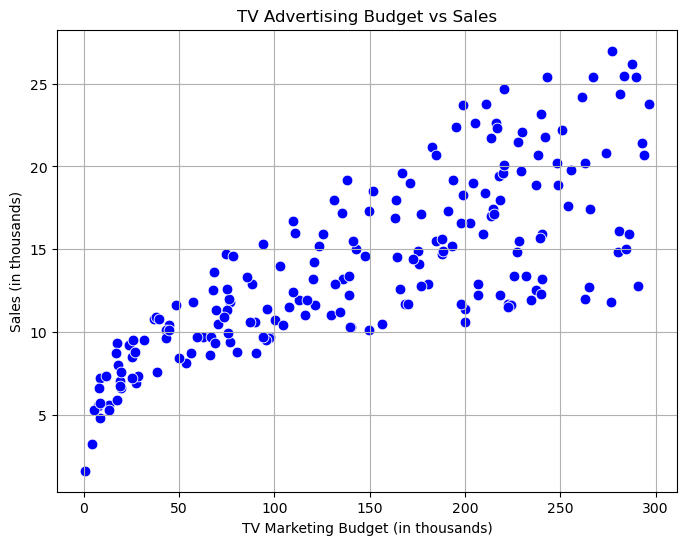

In [7]:
#Visualize the relationship between the features and the dependent variable using scatterplots

df = pd.read_csv("tvmarketing.csv")

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='TV', y='Sales', color='blue', s=60)
plt.title("TV Advertising Budget vs Sales")
plt.xlabel("TV Marketing Budget (in thousands)")
plt.ylabel("Sales (in thousands)")
plt.grid(True)
plt.show()


In [8]:
#6. Prepare X (feature) and y (target)

X = df['TV'].values
y = df['Sales'].values

In [9]:
#7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train,y_train, X_test, y_test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)


In [10]:
#8. Print the shape of train data and test data

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (140,) (140,)
Test shape: (60,) (60,)


In [11]:
#9. Perform Linear Regression (on train data) without using any library and print the coefficients values

import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)

mean_x = np.mean(X_train)
mean_y = np.mean(y_train)

numerator = np.sum((X_train - mean_x)*(y_train - mean_y))
denominator = np.sum((X_train - mean_x)**2)

slope = numerator / denominator
intercept = mean_y - slope * mean_x

print(f"Manual coefficient:\nIntercept = {intercept},slope = {slope}")

Manual coefficient:
Intercept = 7.2394598307511355,slope = 0.04640780212815278


In [12]:
#10. Create the model using the calculated coefficients and make predictions on the testing set

y_pred_manual = intercept + slope * X_test

In [13]:
#11. Perform Linear Regression using library(sklearn)

from sklearn.linear_model import LinearRegression

X_train_2D = X_train.reshape(-1,1)
X_test_2D = X_test.reshape(-1,1)

model = LinearRegression()
model.fit(X_train_2D,y_train)

LinearRegression()

In [14]:
#12. Print the intercept and coefficients

print("sklearn Intercept :", model.intercept_)
print("sklearn coefficient:", model.coef_[0])

sklearn Intercept : 7.23945983075114
sklearn coefficient: 0.04640780212815275


In [15]:
#13. Make predictions on the testing set - y_pred

y_pred_sklearn = model.predict(X_test_2D)

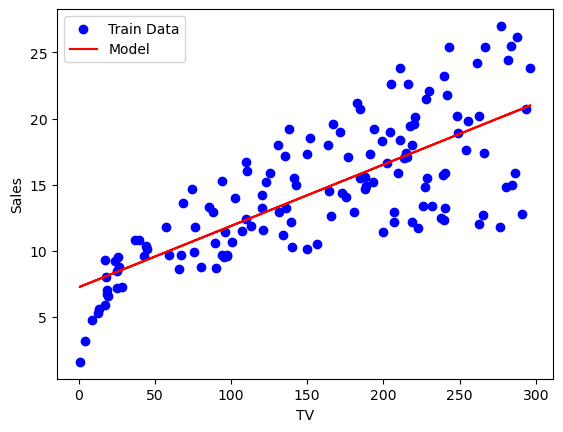

In [20]:
#14. Plot train data and the model

import matplotlib.pyplot as plt

plt.scatter(X_train,y_train, color='blue', label = 'Train Data')
plt.plot(X_train, model.predict(X_train_2D), color='red',label='Model')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

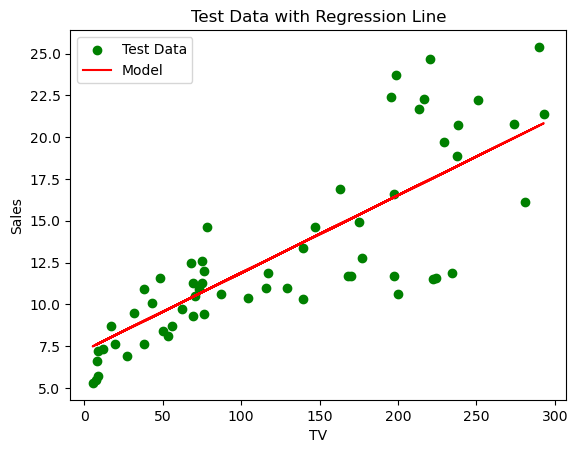

In [17]:
#15. Plot test data and the model

plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_pred_sklearn, color='red', label='Model')
plt.title("Test Data with Regression Line")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [18]:
#16. Print Mean Squared Error and R Squared Value

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)

print("Mean_squared_error: ", mse)
print("R-squared value: ", r2)

Mean_squared_error:  8.970991242413616
R-squared value:  0.6714477229302764


In [19]:
#17. Calculate and print R Squared and Adjusted R Squared values without any library

ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_residual = np.sum((y_test - y_pred_manual)**2)
r2_manual = 1 - (ss_residual / ss_total)

# Adjusted R²
n = len(y_test)
k = 1  # number of predictors

adjusted_r2 = 1 - ((1 - r2_manual) * (n - 1) / (n - k - 1))

print("Manual R²:", r2_manual)
print("Adjusted R²:", adjusted_r2)

Manual R²: 0.6714477229302767
Adjusted R²: 0.66578302849804
